## Multi pulse excitation
In this Session we are explaining some more properties of the source class. 
More precisely: We are showing how one can do multi pulse excitation with 
* Certain pulse frequency until the end of the time scope of the simulation
* Custom defined number of pulses with a set frequency 
    
First we will import the file and then work with it. 
(Even though the package `numerical units` is not a dependency, we will use it here for reasons of simplicity and to show physical dimensions.)

In [4]:
from NTMpy import NTMpy as ntm
from matplotlib import pyplot as plt
import numpy as np
import numericalunits as u
u.reset_units('SI')

In [5]:
#Define a Source
#consider two layers behind each other
s                           = ntm.source()
s.optical_penetration_depth = [45*u.nm,1*u.m]      #Optical penetration depth for each layer 
s.FWHM                      = 1*u.ps               #FullWidthHalfMax
s.fluence                   = 15*u.mJ/u.cm**2      #Fluence of the Gaussian
s.t0                        = 5*u.ps               #Peake of Gaussian
#Considering multiple pulses
s.multipulse                = 'on'
s.frequency                 = 1/(10*u.ps) 

Note that here the two optical penetration depths are very different with respect to their magnitude. The optical penetration depth of the second layer being so large corresponds to an approximation to infinity. 
This is, the second layer will not absorb any energy from the source. 

In [6]:
#passing on the source to the simulation class. 
#Note that now the input parameters are not relevant but the simulation object is just being
#created to maintain the workflow of this program. 
#We are considering a simulation for the 2 temperature model (electron and lattice system)
#where one layer of STO is behind one layer of SRO. Parameters for the electron and lattice system 
#are given in a list from for each layer respectively.
sim = ntm.simulation(2,s) 
#add layers (Length,conductivity,heatCapacity,density,coupling)
sim.addLayer(40e-9,[6,1],[lambda Te: 0.112*Te,450],6500,5e17) #SRO Layer
sim.addLayer(80e-9,[12,1],[lambda Te: 0.025*Te,730],5100,5e17)#STO Layer
sim.final_time = 100*u.ps                                     #final time of the simulation

In [7]:
#Create a visual object where the simulation gets passed on 
v = ntm.visual(sim)

------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.79e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 3580/3580 [00:01<00:00, 3405.54it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 1.0668458938598633
-----------------------------------------------------------


------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 3580/3580 [00:01<00:00, 3354.92it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 1.0670897960662842
-----------------------------------------------------------


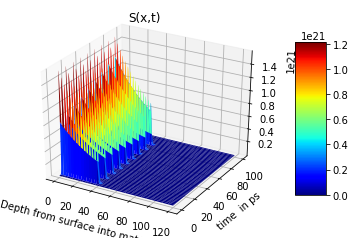

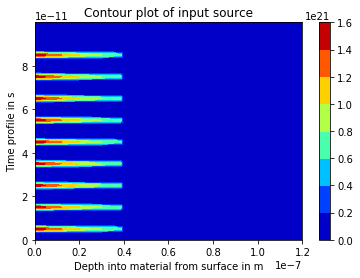

In [8]:
v  = ntm.visual(sim)
#output of v.source is the full matrix of the source(x,t)
so = v.source()

As described above, the fact that the optical penetration depth of the second layer is set to be so huge makes it look like as if there is no energy absorbed in this layer. Hence we can see a cut off exactly at the boundary. 

In a second case we want to demonstrate, that the number of pulses can also be controlled.

In [9]:
#Define a Source
#consider two layers behind each other
s                           = ntm.source()
s.optical_penetration_depth = [45*u.nm,1*u.m]      #Optical penetration depth for each layer 
s.FWHM                      = 1*u.ps               #FullWidthHalfMax
s.fluence                   = 15*u.mJ/u.cm**2      #Fluence of the Gaussian
s.t0                        = 5*u.ps               #Peake of Gaussian
#Considering multiple pulses
s.multipulse                = 'on'
s.frequency                 = 1/(10*u.ps)
s.num_of_pulses             = 2                    #Only 2 pulses 

In [10]:
sim = ntm.simulation(2,s) 
#add layers (Length,conductivity,heatCapacity,density,coupling)
sim.addLayer(40e-9,[6,1],[lambda Te: 0.112*Te,450],6500,5e17) #SRO Layer
sim.addLayer(80e-9,[12,1],[lambda Te: 0.025*Te,730],5100,5e17)#STO Layer
sim.final_time = 100*u.ps  

------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.79e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied.
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 3580/3580 [00:01<00:00, 3130.45it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 1.1436059474945068
-----------------------------------------------------------


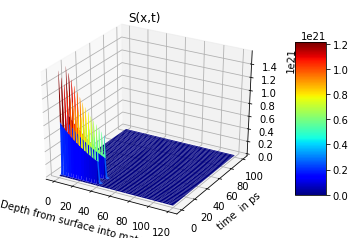

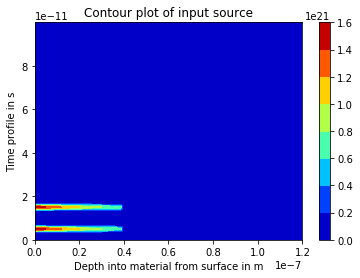

In [11]:
v  = ntm.visual(sim)
so = v.source()

We can now also look at the influence of multiple pulses on the electron and on the lattice system. 
Note that we are considering zero flux Neumann boundary conditions. This means, that there is no heat flux outside of the material under consideration. 

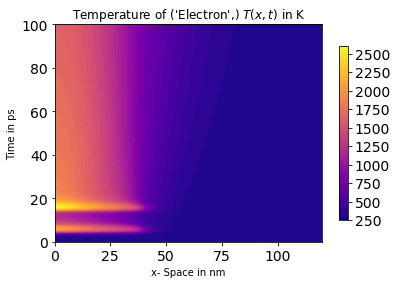

In [12]:
v.contour('Electron')

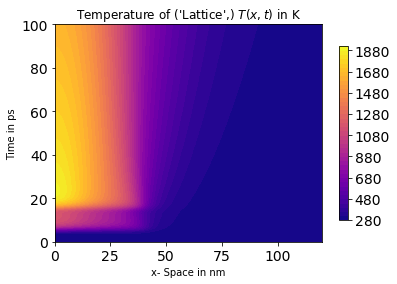

In [13]:
v.contour('Lattice') 

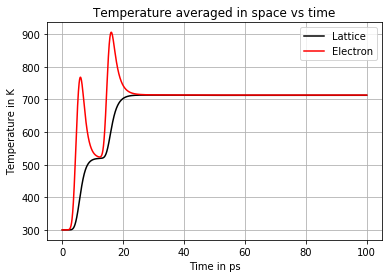

In [14]:
[time,Te,Tl] = v.average()